In [7]:
import os, sys
sys.path.append(os.path.abspath(os.getcwd()))

In [8]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
from scipy import stats
import numpy as np

from tfload import get_tblogs

In [126]:
df_stat19 = get_tblogs("DCEnv/RAFSINE/PPO/baseline/211115_080652_check_stationary_flows/trial_0_2021-11-15_08-06-53")
df_stat20 = get_tblogs("DCEnv/RAFSINE/PPO/baseline/211113_084615_check_stationary_flows/trial_0_2021-11-13_08-46-15")
df_opt20 = get_tblogs("DCEnv/RAFSINE/PPO/baseline/211109_153734_check_optimal_flows/trial_0_2021-11-09_15-37-35")
df_opt19 = get_tblogs("DCEnv/RAFSINE/PPO/baseline/211115_080952_check_optimal_flows/trial_0_2021-11-15_08-09-52")
df_rl = get_tblogs("DCEnv/RAFSINE/PPO/serveronlyconv/211113_083725_serveronly_env8_ts2M_avgload150/trial_0_2021-11-13_08-37-25")

In [128]:
dfs = [df_stat19, df_stat20, df_opt19, df_opt20, df_rl]
df_names = ["even load 19", "even load 20", "optimal load 19", "optimal load 20", "rl load"]

dfs[2] = dfs[2].rename({t : int(t/8) for t in dfs[2].index.values}, axis=0)

In [136]:
dfs = list(map(lambda x: x[x.index <= 150000], dfs))

In [137]:
server_flows = [np.concatenate([df.filter(regex=f".*srv{i}/flow").to_numpy() for i in range(360)], axis=1) for df in dfs]
server_loads = [np.concatenate([df.filter(regex=f".*srv{i}/load").to_numpy() for i in range(360)], axis=1) for df in dfs]
server_inlets = [np.concatenate([df.filter(regex=f".*srv{i}/temp_in").to_numpy() for i in range(360)], axis=1) for df in dfs]

In [138]:
def plot_server_grid(data, name, method="mean"):
    if method == "mean":
        pdata = np.mean(data, axis=0).reshape(12, 10, 3)
    elif method == "variance":
        pdata = np.var(data, axis=0).reshape(12, 10, 3)

    vmin = pdata.min()
    vmax = pdata.max()
    if vmin == vmax: # To avoid weird when they are equal
        vmax += 1

    fig, axs = plt.subplots(2, 6, figsize=(15, 7))
    for rack in range(12):
        ax = axs[rack // 6, rack % 6]
        mesh = ax.pcolormesh(pdata[rack, :, :], vmin=vmin, vmax=vmax) 
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)

    fig.colorbar(mesh, ax=axs)
    fig.suptitle(name)

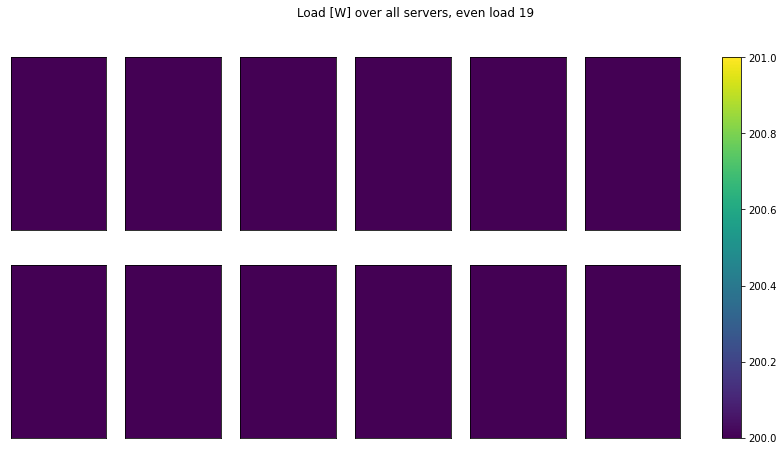

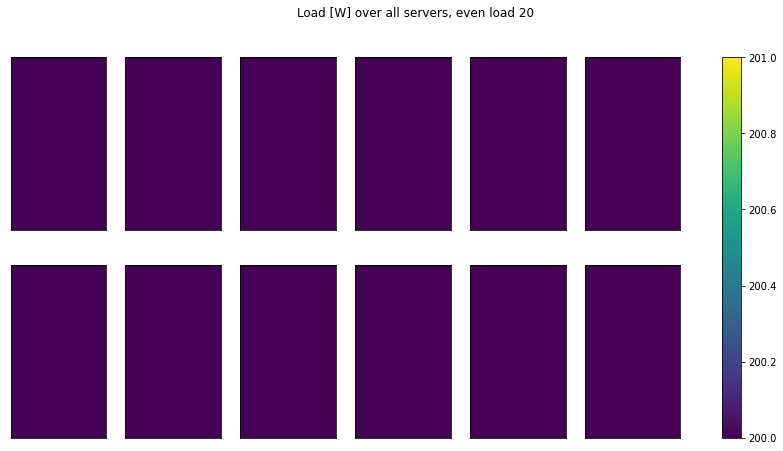

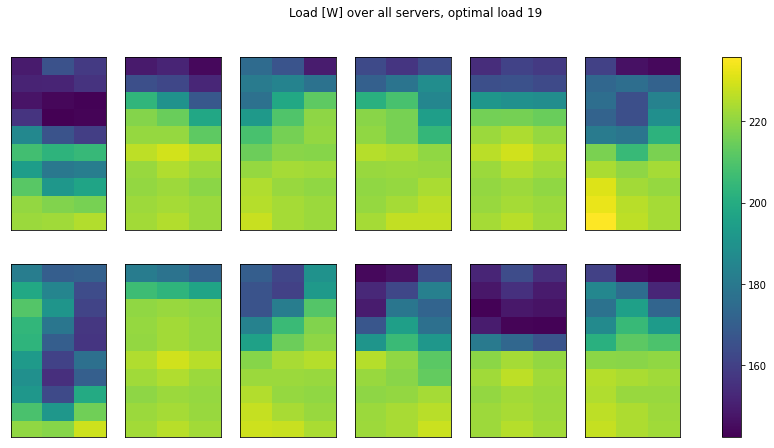

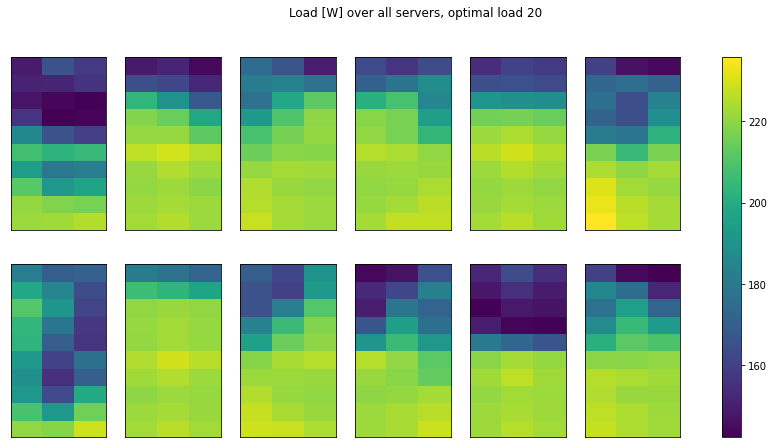

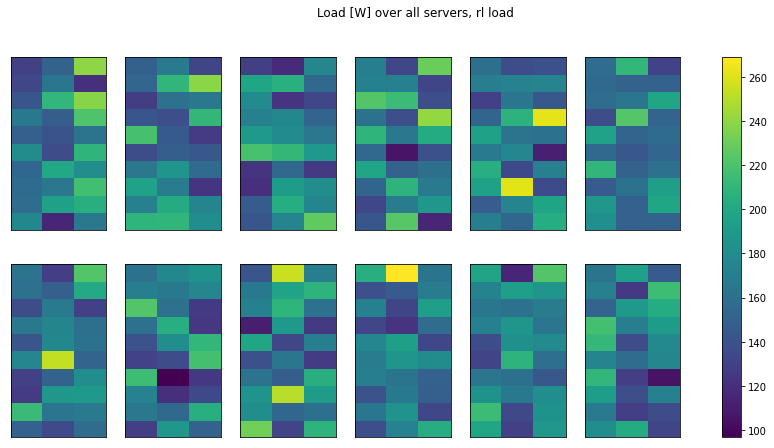

In [139]:
for i in range(len(dfs)):
    plot_server_grid(server_loads[i], f"Load [W] over all servers, {df_names[i]}")

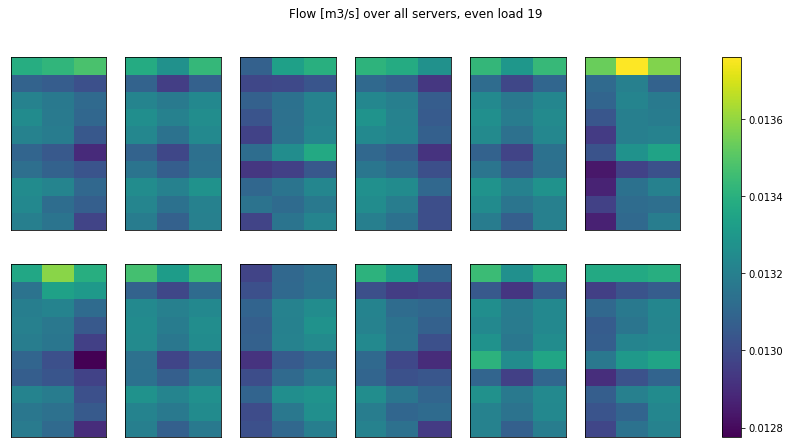

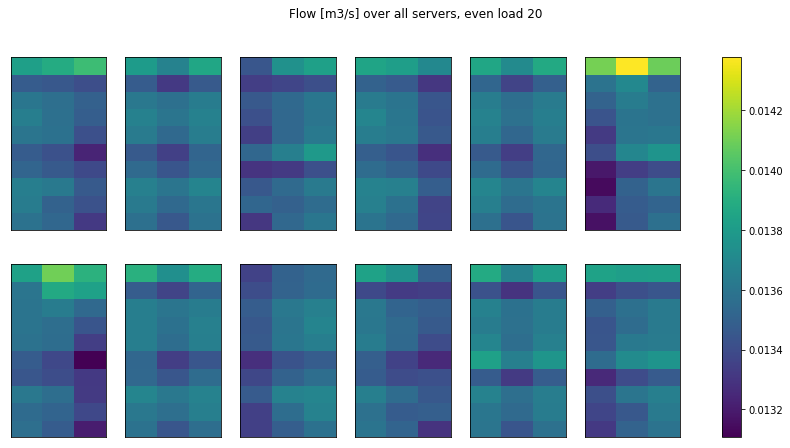

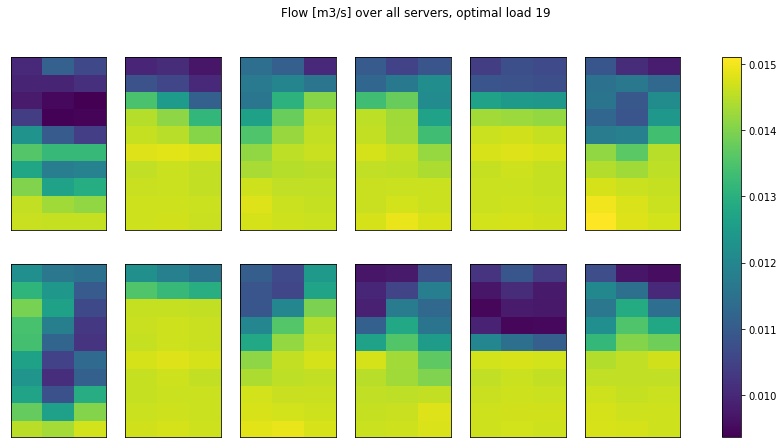

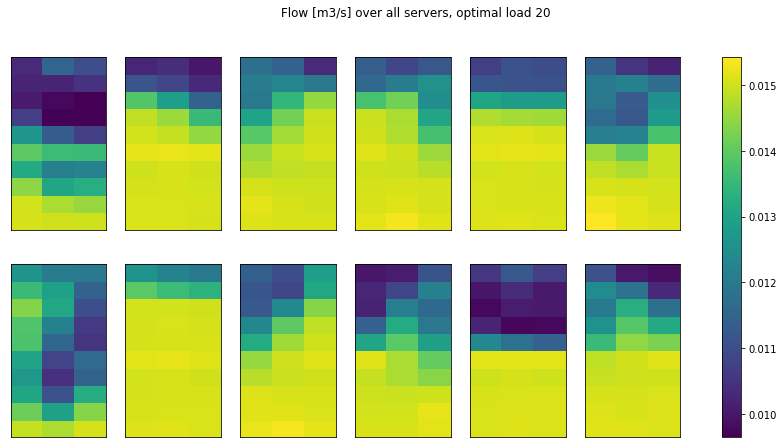

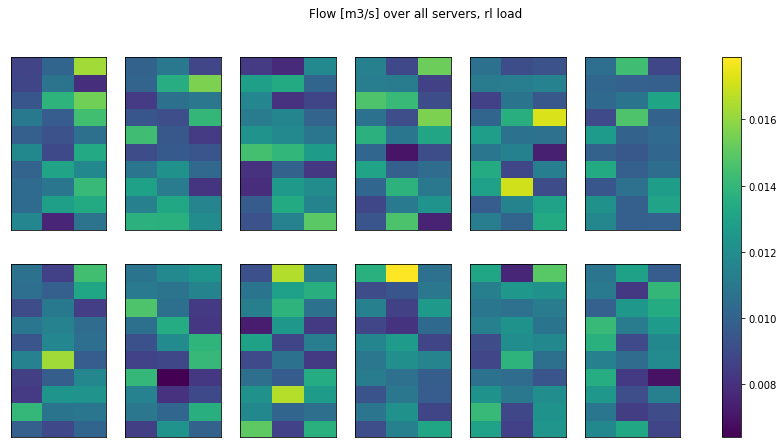

In [140]:
for i in range(len(dfs)):
    plot_server_grid(server_flows[i], f"Flow [m3/s] over all servers, {df_names[i]}")

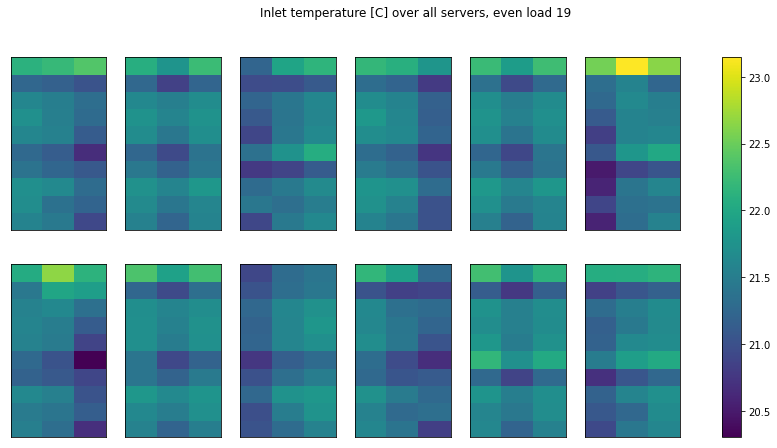

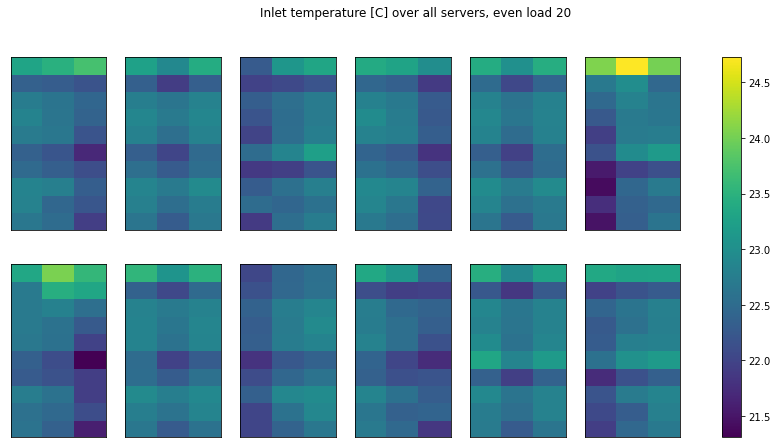

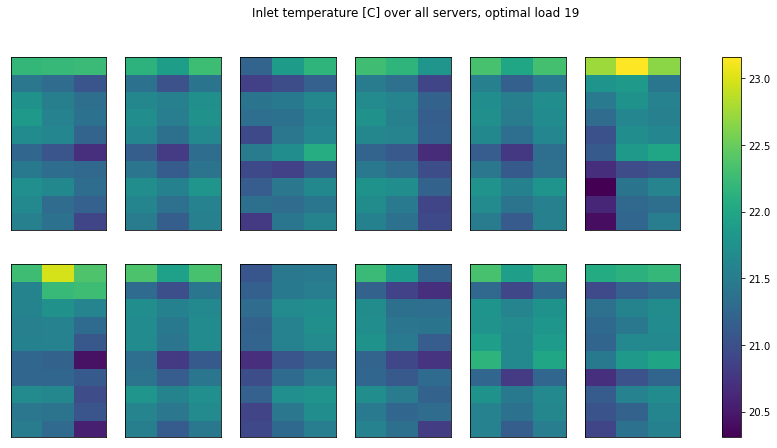

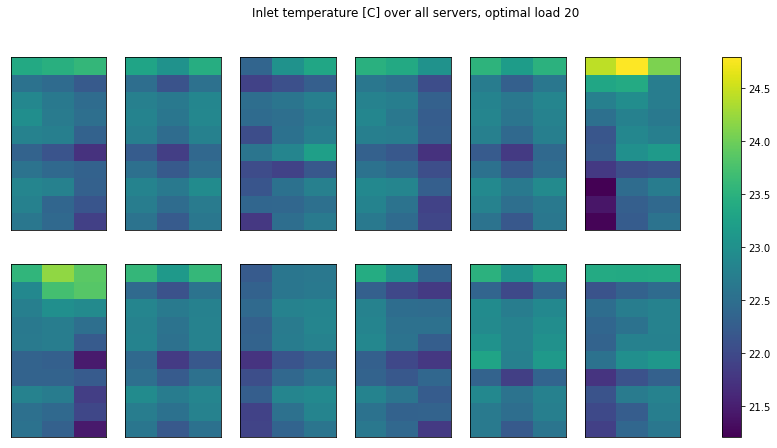

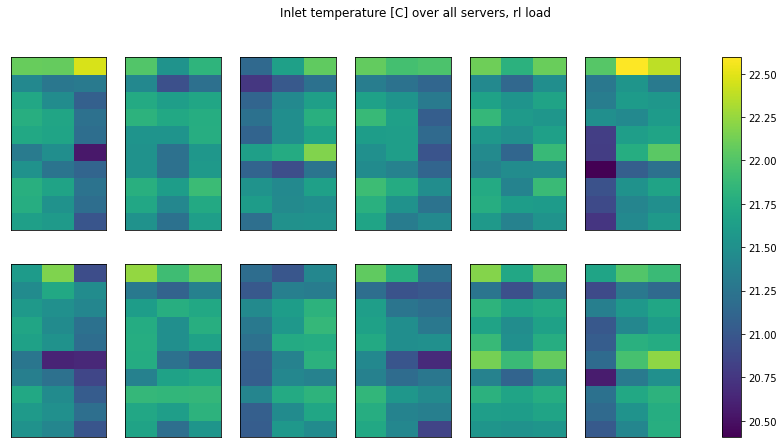

In [141]:
for i in range(len(dfs)):
    plot_server_grid(server_inlets[i], f"Inlet temperature [C] over all servers, {df_names[i]}")

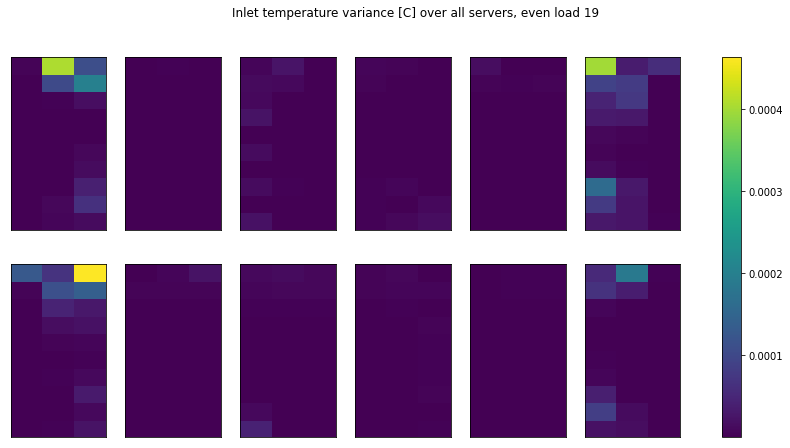

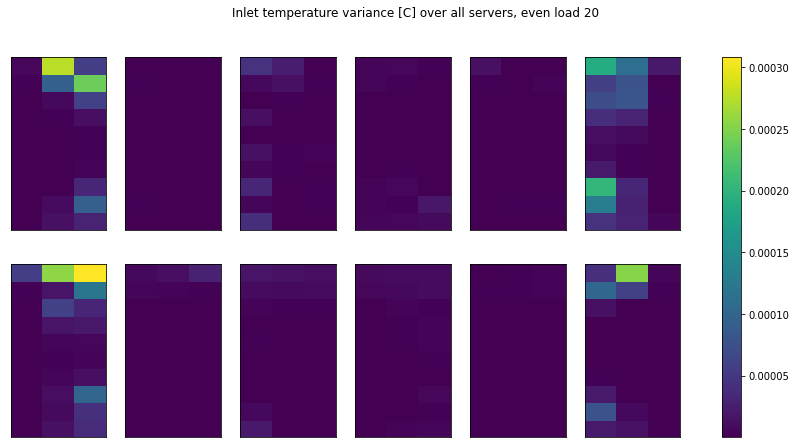

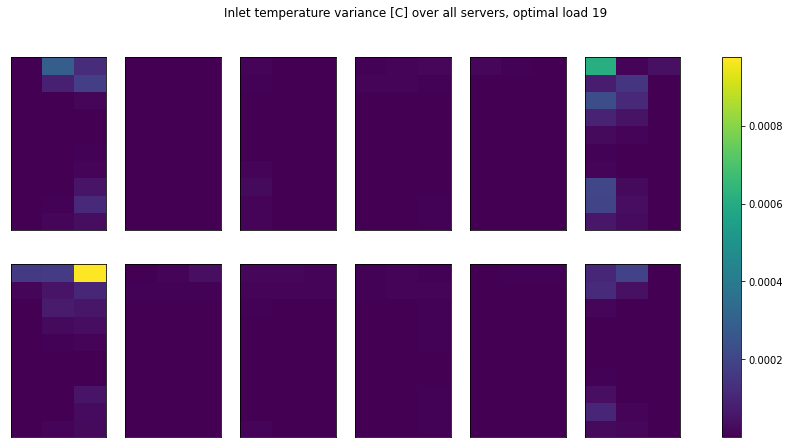

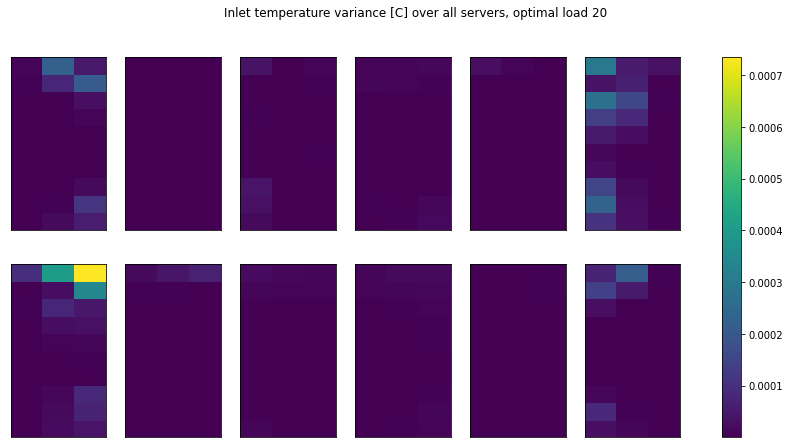

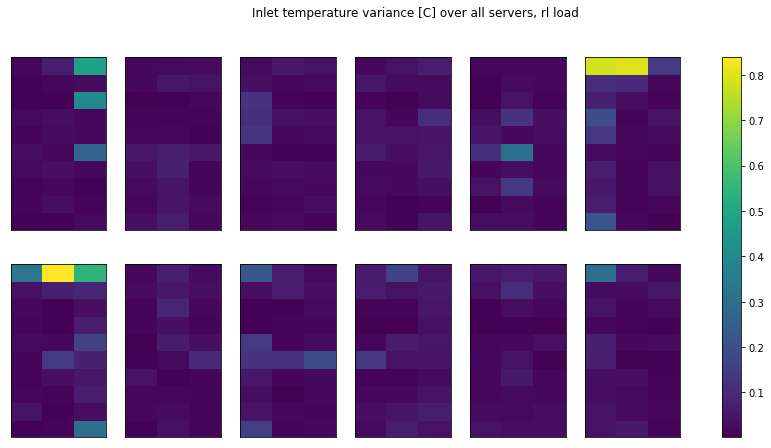

In [135]:
for i in range(len(dfs)):
    plot_server_grid(server_inlets[i], f"Inlet temperature variance [C] over all servers, {df_names[i]}", method="variance")

In [ ]:
server_fan_power = [df.filter(regex=f".*power/server_fan").to_numpy() for df in dfs]
crah_fan_power = [df.filter(regex=f".*power/crah_fan").to_numpy() for df in dfs]
compressor_power = [df.filter(regex=f".*power/compressor").to_numpy() for df in dfs]

In [ ]:
plt.figure()
for i in range(3):
    plt.plot(server_fan_power[i])
plt.legend(df_names)
plt.title("Server energy")
     
plt.figure()
for i in range(3):
    plt.plot(server_fan_power[i] + crah_fan_power[i] + compressor_power[i])
plt.legend(df_names)
plt.title("Total energy")